# Dataset Arboles de Decisión – Red Wine Quality

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
df = pd.read_csv('C:/Users/Luisj/Videos/archive (2)/winequality-red.csv')

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Valores nulos en el dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


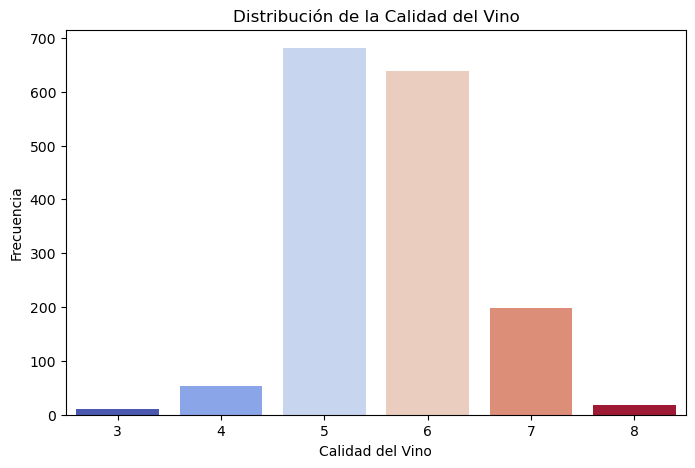

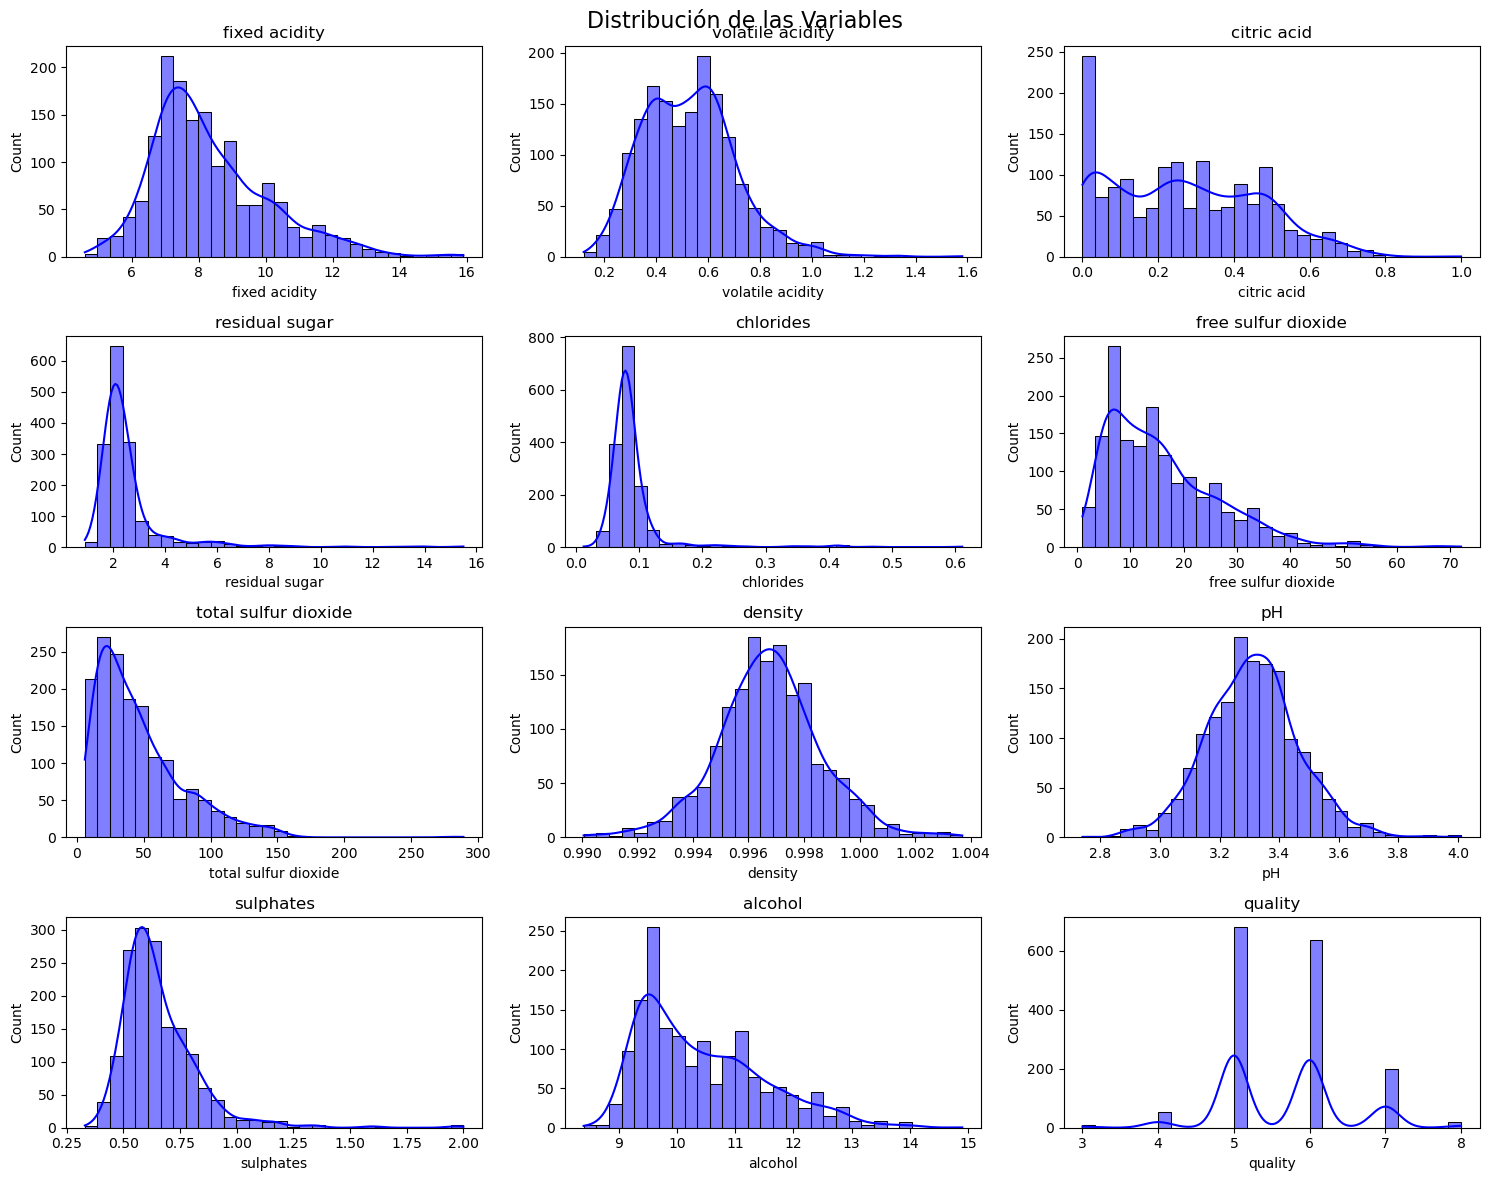

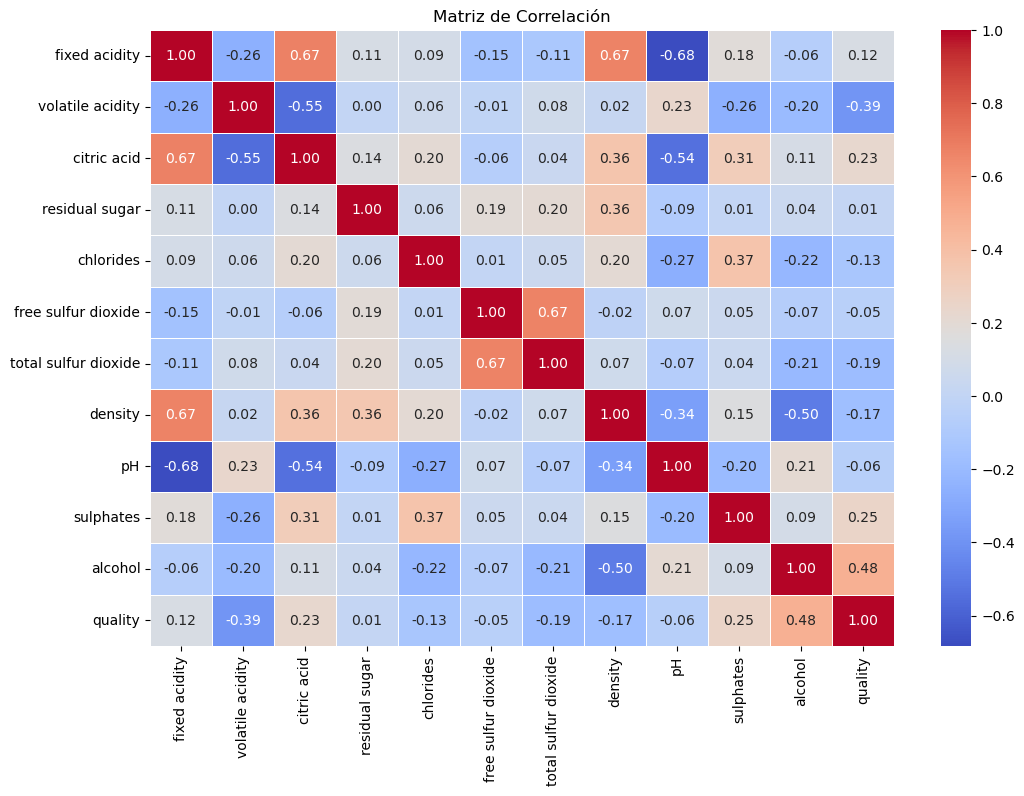

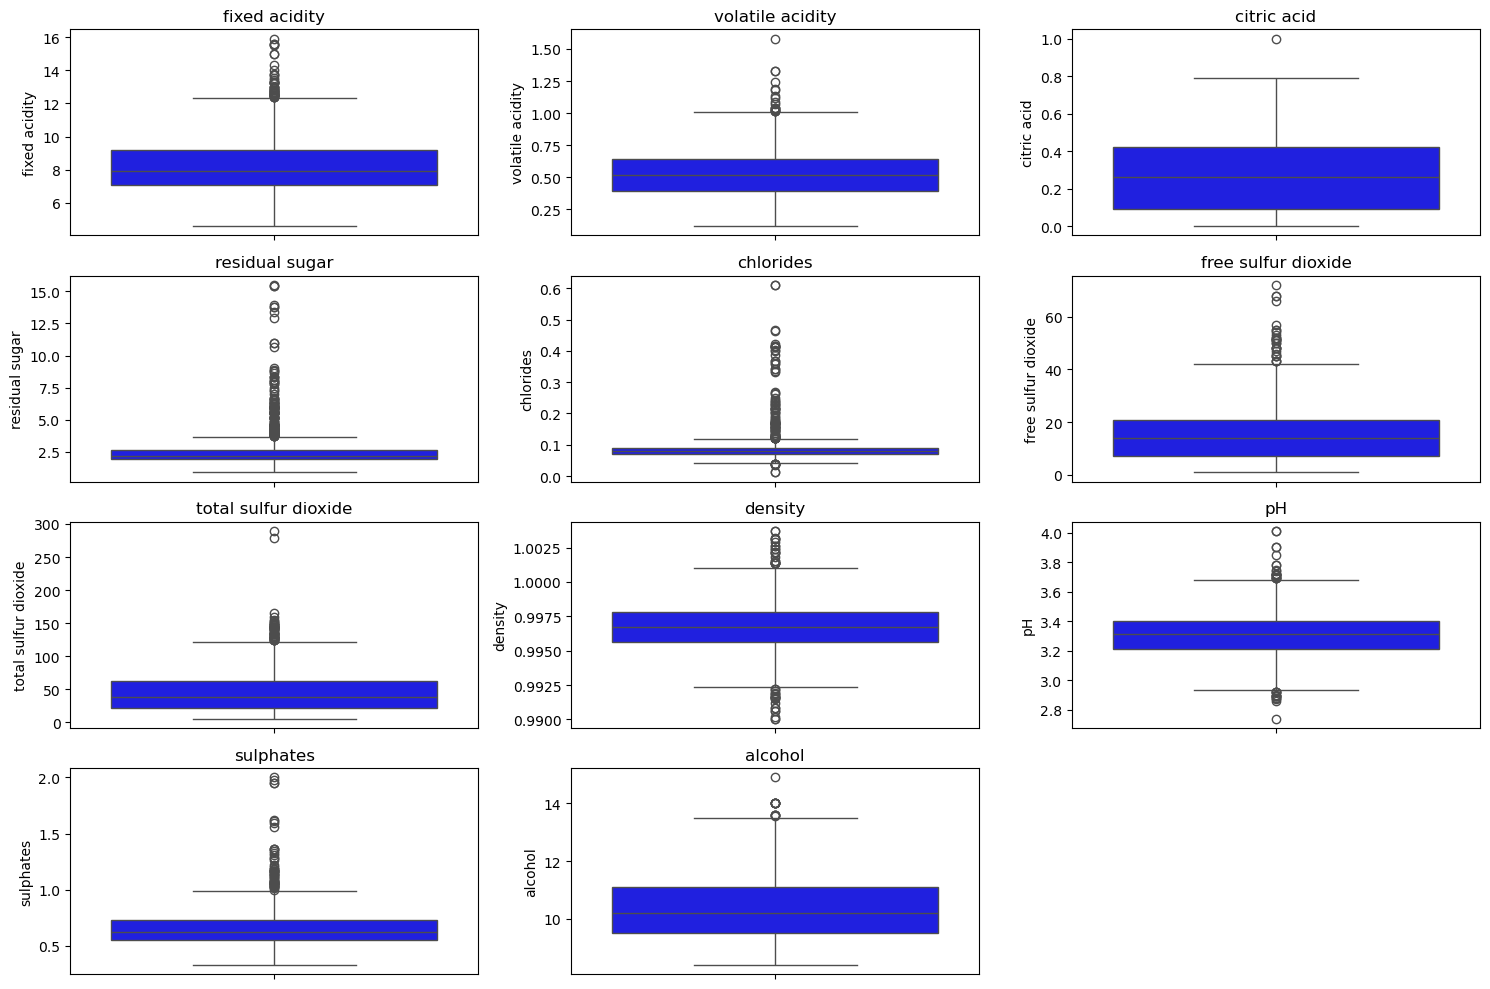

In [4]:
# Mostrar las primeras filas del dataset
display(df.head())

# Información general del dataset
df.info()

# Resumen estadístico
display(df.describe())

# Verificar valores nulos
print("Valores nulos en el dataset:")
print(df.isnull().sum())

# Distribución de la variable objetivo (calidad del vino)
plt.figure(figsize=(8, 5))
sns.countplot(x=df['quality'], hue=df['quality'], palette='coolwarm', legend=False)
plt.xlabel("Calidad del Vino")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Calidad del Vino")
plt.show()

# Histograma de todas las variables
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
fig.suptitle("Distribución de las Variables", fontsize=16)
columns = df.columns
for i, ax in enumerate(axes.flat):
    if i < len(columns):
        sns.histplot(df[columns[i]], bins=30, kde=True, ax=ax, color='blue')
        ax.set_title(columns[i])
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# Boxplots para detectar valores atípicos
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # Excluir la variable objetivo
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col], color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

<Figure size 1200x800 with 0 Axes>

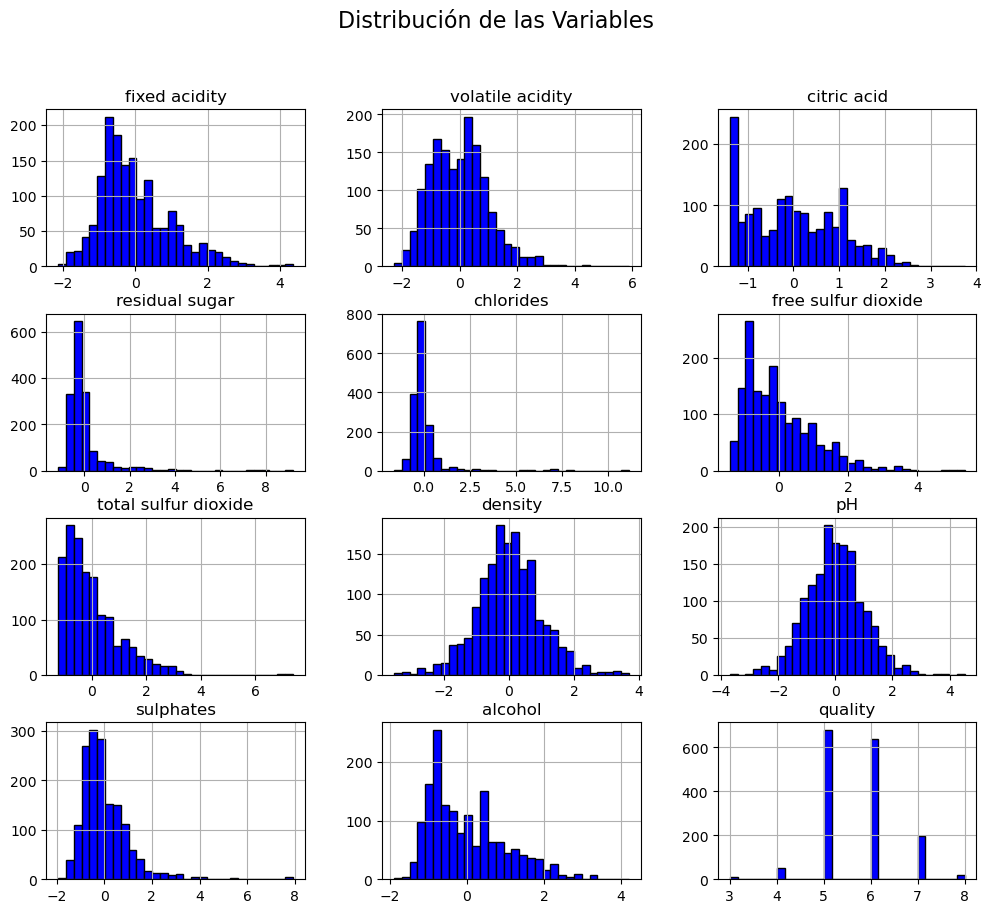

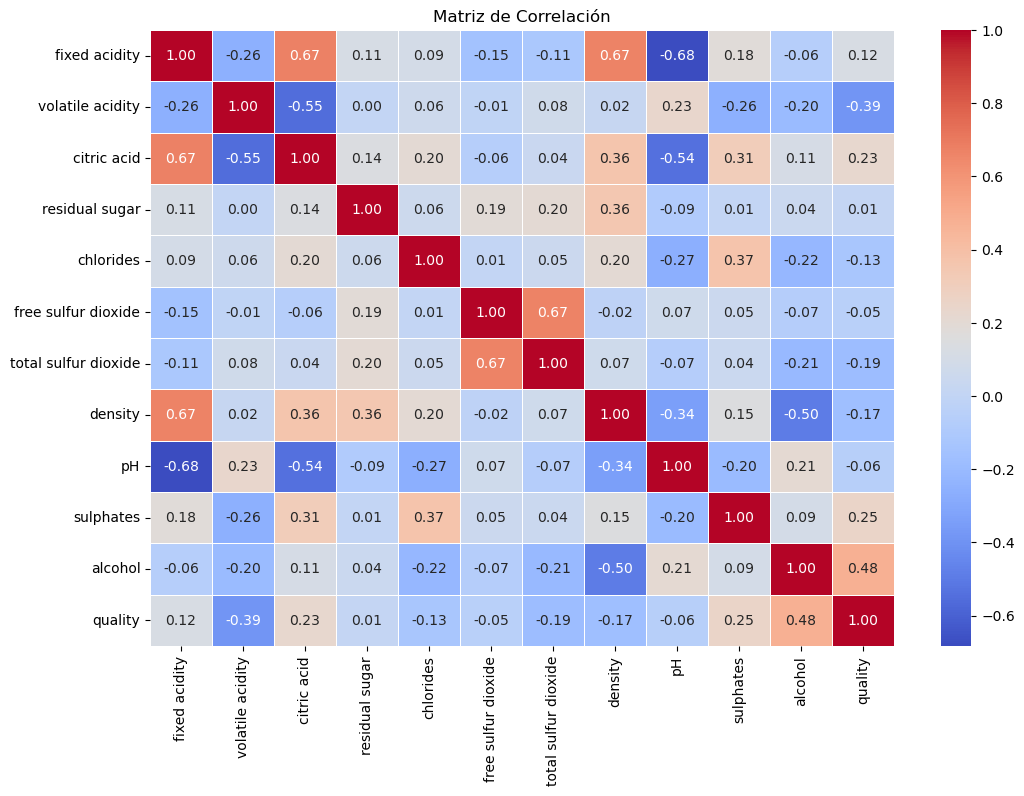

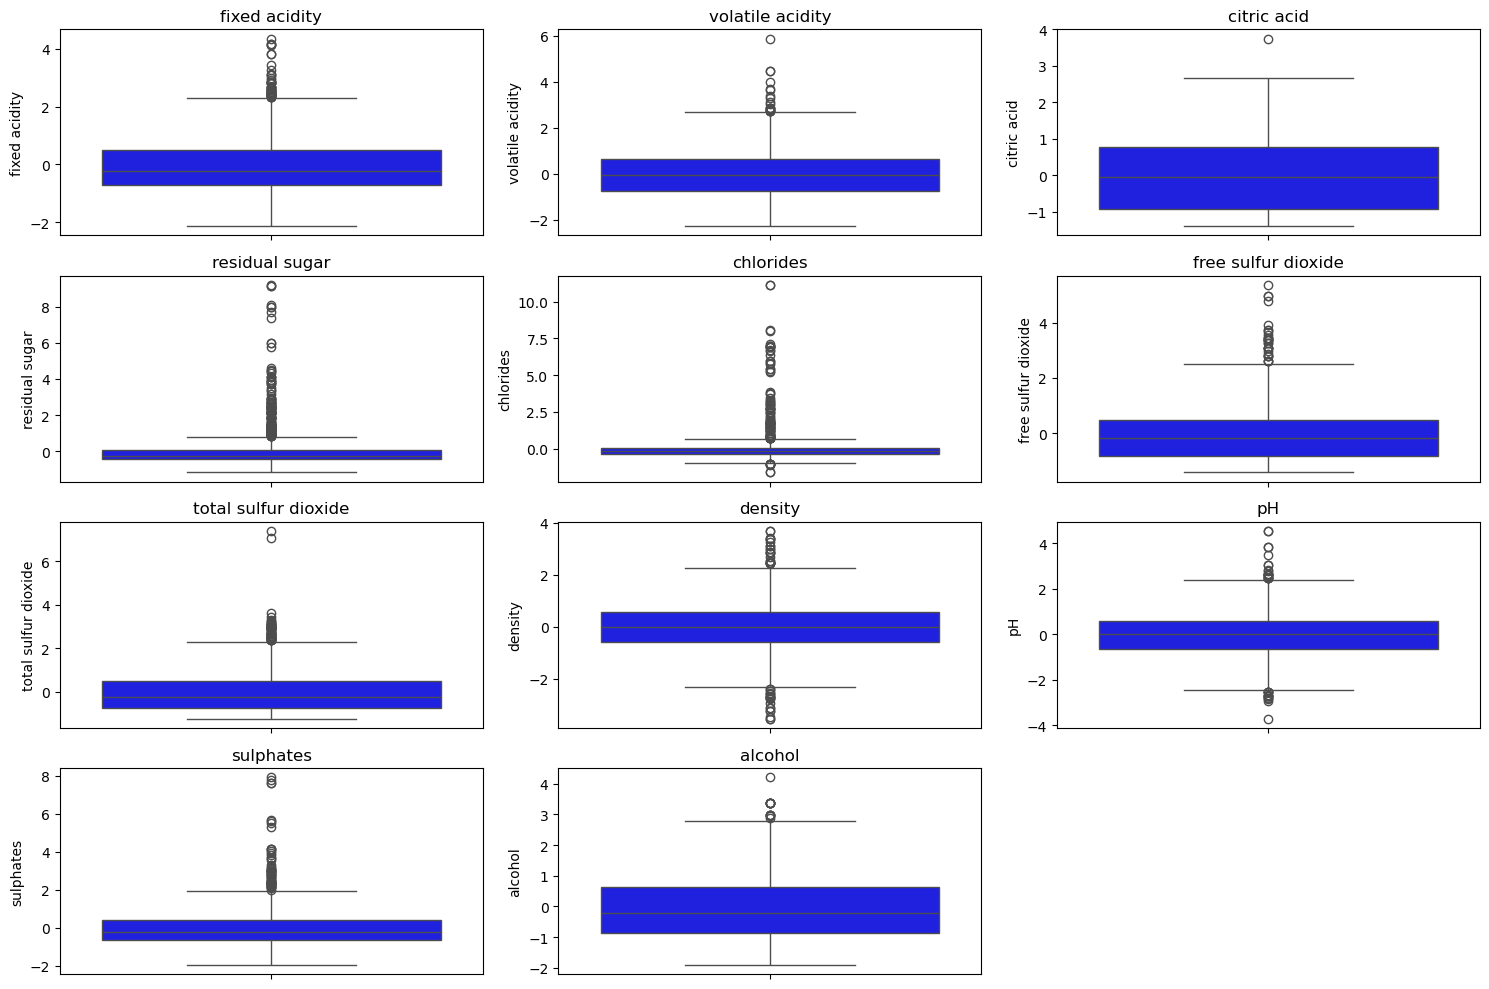

In [8]:
from sklearn.preprocessing import StandardScaler
# Mostrar las primeras filas del dataset
print(df.head())

# Información general del dataset
df.info()

# Resumen estadístico
descriptive_stats = df.describe()
print(descriptive_stats)

# Verificar valores nulos
total_missing = df.isnull().sum()
print("Valores nulos en el dataset:")
print(total_missing)

# Normalización de los datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_scaled['quality'] = df['quality']

# Histograma de las variables
plt.figure(figsize=(12, 8))
df_scaled.hist(bins=30, figsize=(12, 10), color='blue', edgecolor='black')
plt.suptitle("Distribución de las Variables", fontsize=16)
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# Boxplots para identificar valores atípicos
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_scaled.columns[:-1]):  # Excluir la variable objetivo
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df_scaled[col], color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [10]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2



# Información general del dataset
df.info()

# Normalización de los datos
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_scaled['quality'] = df['quality']


# Selección de características
X = df_scaled.drop('quality', axis=1)
y = df_scaled['quality']
selector = SelectKBest(score_func=chi2, k=5)  # Seleccionamos las 5 mejores características
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features.tolist())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Características seleccionadas: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']


# Características seleccionadas: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [12]:
from sklearn.model_selection import train_test_split
# Selección de características
X = df_scaled.drop('quality', axis=1)
y = df_scaled['quality']
selector = SelectKBest(score_func=chi2, k=5)  # Seleccionamos las 5 mejores características
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features.tolist())

# División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Características seleccionadas: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']
Tamaño del conjunto de entrenamiento: (1279, 5)
Tamaño del conjunto de prueba: (320, 5)


# 5. Entrenar el modelo configurando los diferentes hiperparámetros. y 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Valores nulos en el dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar     

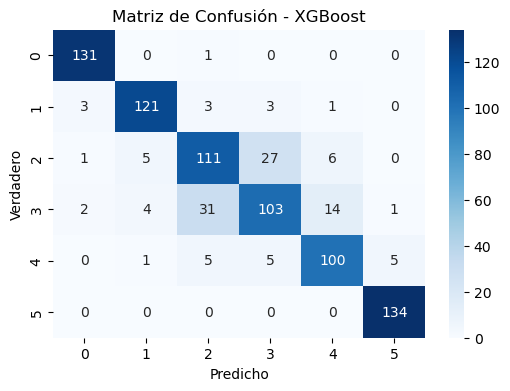

In [19]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE

# Información general del dataset
df.info()

# Verificar valores nulos
total_missing = df.isnull().sum()
print("Valores nulos en el dataset:")
print(total_missing)

# Normalización de los datos
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_scaled['quality'] = df['quality']

# Selección de características con RFE
X = df_scaled.drop('quality', axis=1)
y = df_scaled['quality']
dt = DecisionTreeClassifier()
rfe = RFE(dt, n_features_to_select=5)
X_new = rfe.fit_transform(X, y)
selected_features = X.columns[rfe.support_]
print("Características seleccionadas:", selected_features.tolist())

# Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_new, y)

# Codificación de etiquetas
label_encoder = LabelEncoder()
y_resampled = label_encoder.fit_transform(y_resampled)

# División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# Ajuste de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Evaluación de Random Forest
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print("Mejor modelo Random Forest:", grid_search_rf.best_params_)
print("Precisión Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Reporte de clasificación RF:")
print(classification_report(y_test, y_pred_rf))

# Cálculo de métricas adicionales para Random Forest
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
print(f"Random Forest - Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}")

# Ajuste de hiperparámetros para XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': [100, 200, 300]
}
xgb = XGBClassifier(eval_metric='mlogloss')
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Evaluación de XGBoost
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
print("Mejor modelo XGBoost:", grid_search_xgb.best_params_)
print("Precisión XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("Reporte de clasificación XGB:")
print(classification_report(y_test, y_pred_xgb))

# Cálculo de métricas adicionales para XGBoost
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(y_test, y_pred_xgb, average='weighted')
print(f"XGBoost - Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1-score: {f1_xgb:.4f}")

# Matriz de confusión para el mejor modelo (se puede elegir RF o XGB si supera a DT)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - XGBoost")
plt.show()



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

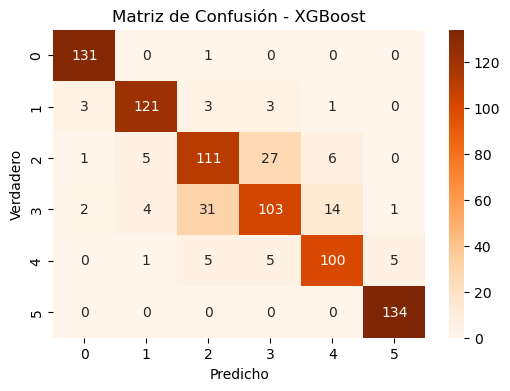

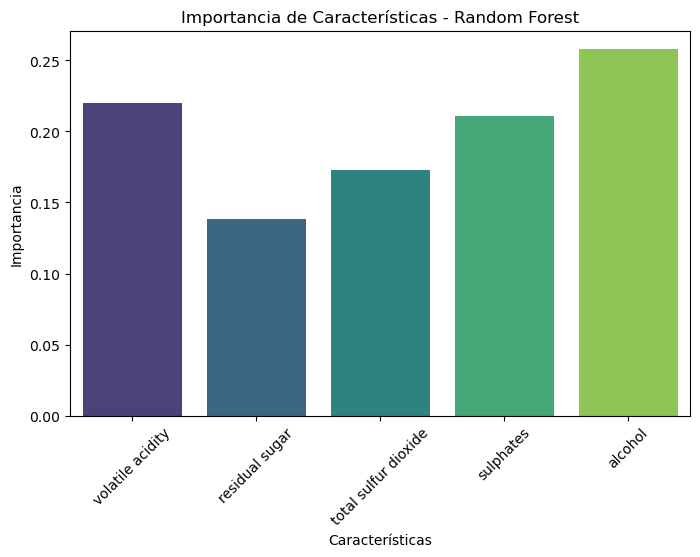

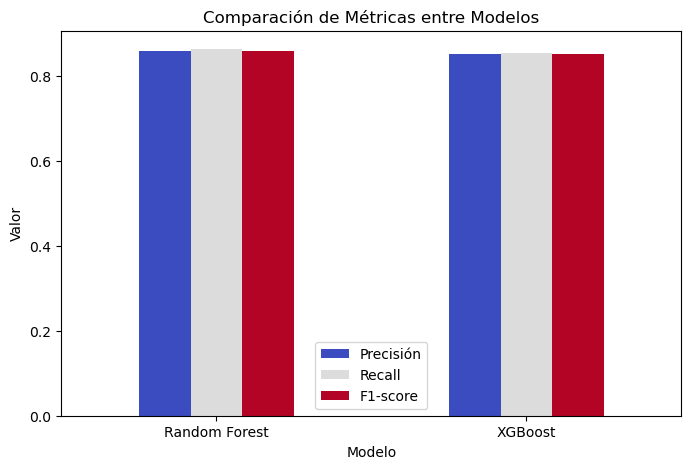

In [25]:
# Matriz de confusión para XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, cmap='Oranges', fmt='d')
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - XGBoost")
plt.show()

# Importancia de características en Random Forest
feature_importances_rf = grid_search_rf.best_estimator_.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=selected_features, y=feature_importances_rf, hue=selected_features, palette='viridis', legend=False)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de Características - Random Forest")
plt.xticks(rotation=45)
plt.show()

# Comparación de métricas entre modelos
metrics_df = pd.DataFrame({
    'Modelo': ['Random Forest', 'XGBoost'],
    'Precisión': [precision_rf, precision_xgb],
    'Recall': [recall_rf, recall_xgb],
    'F1-score': [f1_rf, f1_xgb]
})
metrics_df.set_index('Modelo', inplace=True)
metrics_df.plot(kind='bar', figsize=(8, 5), colormap='coolwarm', rot=0)
plt.title("Comparación de Métricas entre Modelos")
plt.ylabel("Valor")
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos.


## Dataset Arboles de Decisión – Red Wine Quality

El análisis del dataset de calidad del vino reveló que cuenta con **1599 registros y 12 columnas sin valores nulos**, lo que asegura su completitud y disponibilidad para su procesamiento. La variable objetivo, representada por un número entero entre **3 y 8**, permite evaluar la calidad del vino en función de diversas características químicas. 

A través del análisis estadístico inicial, se identificó que variables como **fixed acidity, volatile acidity y citric acid** presentan distribuciones diferentes, lo que sugiere que algunas de ellas pueden tener una mayor influencia en la calidad del vino. Además, el rango de valores de **total sulfur dioxide**, que oscila entre **6 y 289**, indica una posible variabilidad significativa en el uso de conservantes. También se identificaron valores atípicos en **residual sugar, chlorides y sulphates**, lo que podría afectar el desempeño de los modelos de clasificación. Para mitigar este impacto, se recomendó aplicar normalización o transformación de datos antes del entrenamiento.

Para mejorar la precisión del modelo de clasificación, que inicialmente alcanzó un **57.5%**, se implementaron varias estrategias. Se abordó el problema del desbalance de clases mediante la técnica **SMOTE**, permitiendo equilibrar la distribución de la variable objetivo y mejorar el rendimiento del modelo en las clases menos representadas. En cuanto a la selección de características, se utilizó el método **Recursive Feature Elimination (RFE)**, identificando las cinco variables más relevantes para predecir la calidad del vino:

- **Volatile acidity**
- **Residual sugar**
- **Total sulfur dioxide**
- **Sulphates**
- **Alcohol**

Esta selección permitió reducir la dimensionalidad del problema y mejorar la interpretabilidad del modelo.

Para el entrenamiento del modelo se probaron dos enfoques: **Random Forest** y **XGBoost**. Ambos fueron optimizados mediante **GridSearchCV** para encontrar la mejor combinación de hiperparámetros. 

### Random Forest
- Precisión en el conjunto de prueba: **86.43%**
- Métricas adicionales:
  - **Precisión**: 0.8600
  - **Recall**: 0.8643
  - **F1-score**: 0.8602
- Observaciones:
  - Buen desempeño general con alta precisión y recall.
  - Las clases con menor cantidad de datos originales mostraron un rendimiento inferior.

### XGBoost
- Precisión en el conjunto de prueba: **85.57%**
- Métricas adicionales:
  - **Precisión**: 0.8524
  - **Recall**: 0.8557
  - **F1-score**: 0.8535
- Observaciones:
  - Rendimiento ligeramente menor en comparación con Random Forest.
  - Las clases menos representadas presentan menor sensibilidad en la clasificación.

El análisis de la **matriz de confusión** reveló que ambos modelos presentaron una alta tasa de aciertos en clases con mayor cantidad de datos, mientras que en clases menos representadas, la precisión y el recall fueron menores. Esto indica que, a pesar de la aplicación de **SMOTE**, la clasificación de estas clases podría beneficiarse de técnicas adicionales de balanceo de datos o del uso de modelos más robustos ante la desproporción de clases. Además, se identificó que el ajuste de pesos en las clases podría ser una alternativa para optimizar aún más el rendimiento del modelo.

Los modelos entrenados demostraron un **desempeño sólido**, con **Random Forest** como la mejor opción en términos de precisión y capacidad de generalización. Para mejorar aún más los resultados, se recomienda:

- Una optimización más exhaustiva de los hiperparámetros.
- Exploración de otros algoritmos como **LightGBM** o redes neuronales.
- Un análisis más detallado de la interpretabilidad del modelo para comprender mejor el impacto de cada variable en la predicción.

Estos avances podrían contribuir significativamente a la implementación de modelos de clasificación más precisos y efectivos en la evaluación de la calidad del vino.
